In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
X,y = sklearn.datasets.make_moons(200, noise = 0.15)

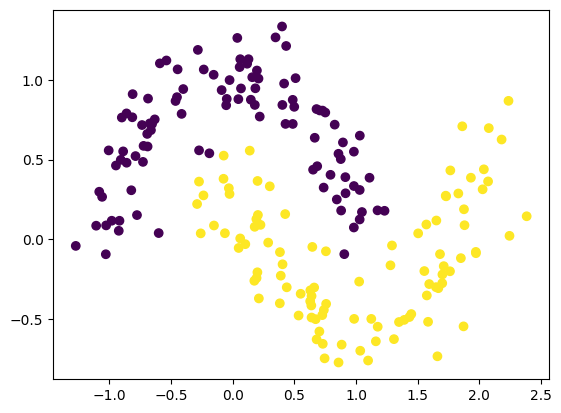

In [4]:
plt.scatter(X[:,0],X[:,1], c=y)

In [5]:
print(X.shape, y.shape)

(200, 2) (200,)


In [6]:
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

In [7]:
def retreive(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [8]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return z1, a1, softmax

In [9]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(m)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss+= reg_loss
    return float(loss / y.shape[0])

In [10]:
def predict(model_dict, x):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)   # (200,2)
    return np.argmax(softmax, axis = 1)    # (200,)

### Equations for Backprop

![backprop](https://user-images.githubusercontent.com/30661597/67566804-3e405980-f75b-11e9-9e19-f3c388745c0a.png)

## $\frac{\partial L}{\partial y_{1}}=-\tilde{y}_{1}\left[\frac{\left(y_{1}\right)^{\prime}}{y_{1}}\right]=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]$

## $\frac{\partial y_{1}}{\partial z_{1}}=\frac{\partial}{\partial z_{1}} \cdot \frac{e^{z_{1}}}{e^{z_{1}}+e^{z_{2}}+e^{z_{3}}}$

![der](https://user-images.githubusercontent.com/46392773/56460220-ec94cc00-63d1-11e9-91d1-b4e3c57c81fd.png)


## $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]\frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{y_{1}\left(1-y_{1}\right)}{y_{1}}\right]=-\tilde{y}_{1}\left(1-y_{1}\right)$

Recall that our labels are in the form of a one-hot vector: (ex. If class 1 is correct, then the corresponding label is [1,0], if class 2 is correct, then the corresponding label is [0,1]).

If class one is the actual prediction: $\tilde{y}_{1} = 1 $, then we have:

## $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}} = -1(1-y_{1}) = y_{1} - 1 = \delta_{3}$

## $\delta_{2}=\left(1-\tanh ^{2} z_{1}\right) \circ \delta_{3} W_{2}^{T}$

## $\frac{\partial L}{\partial W_{2}}=a_{1}^{T} \delta_{3}$

## $\frac{\partial L}{\partial b_{2}}=\delta_{3}$

## $\frac{\partial L}{\partial W_{1}}=x^{T} \delta 2$

## $\frac{\partial L}{\partial b_{1}}=\delta 2$

### 总结

这段详细解释了反向传播算法的数学原理和公式。反向传播算法用于计算神经网络中每个权重的梯度，从而更新权重以最小化损失函数。文中详细介绍了如何使用链式法则计算损失函数相对于每个权重的导数，并展示了具体的公式和步骤。

### 重要信息提取

1. **反向传播算法**：
   - 用于计算神经网络中每个权重的梯度。
   - 通过最小化损失函数来更新权重。

2. **链式法则**：
   - 计算损失函数相对于每个权重的导数。
   - 包括三个主要步骤：损失相对于输出的导数、输出相对于净输入的导数、净输入相对于权重的导数。

3. **公式和步骤**：
   - 计算损失相对于输出的导数。
   - 计算输出相对于净输入的导数。
   - 计算净输入相对于权重的导数。
   - 使用这些导数更新权重。

### 详细解释
1. **公式和步骤**：
   - **损失相对于输出的导数**：
     - 计算损失函数相对于输出的导数。
     - 使用乘积法则计算导数。
   - **输出相对于净输入的导数**：
     - 计算输出相对于净输入的导数。
     - 使用softmax函数的导数公式。
   - **净输入相对于权重的导数**：
     - 计算净输入相对于权重的导数。
     - 使用输入和权重的关系公式。
   - **更新权重**：
     - 使用计算得到的梯度更新权重。
  

https://www.latexlive.com/## 公式转化网站

这些图片展示了反向传播算法（Backpropagation）的推导过程，特别是用于神经网络的梯度计算。以下是对这些公式推导的解释：

1. **损失函数 \(L\)**:
   \[
   L = -\sum_i \tilde{y}_i \log(y_i)
   \]
   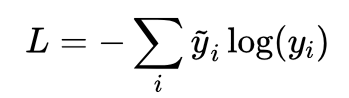
   这是交叉熵损失函数，用于衡量预测值 \(y_i\) 和真实标签 \(\tilde{y}_i\) 之间的差异。

2. **输出层的激活函数 \(y_1\)**:
   \[
   y_1 = \frac{e^{z_1}}{e^{z_1} + e^{z_2}}
   \]
   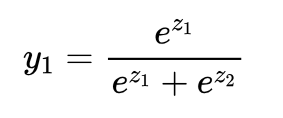
   这是 softmax 函数的一部分，用于将网络的输出转换为概率分布。

3. **隐藏层的线性组合 \(z_1\)**:
   \[
   z_1 = a_1 w_7 + a_2 w_9 + a_3 w_{11}
   \]
   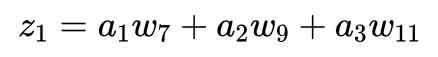
   这是隐藏层神经元的线性组合，\(a_1, a_2, a_3\) 是输入层的激活值，\(w_7, w_9, w_{11}\) 是权重。

4. **损失函数对输出层激活值的偏导数**:
   \[
   \frac{\partial L}{\partial y_1} = -\tilde{y}_1 \left( \frac{1}{y_1} \right) = -\tilde{y}_1 \left( \frac{1}{y_1} \right)
   \]
   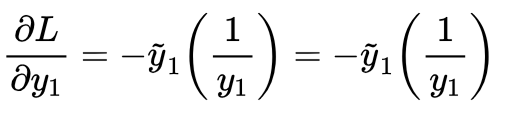
   这是损失函数对输出层激活值的偏导数。

5. **输出层激活值对线性组合的偏导数**:
   \[
   \frac{\partial y_1}{\partial z_1} = \frac{\partial}{\partial z_1} \left( \frac{e^{z_1}}{e^{z_1} + e^{z_2}} \right)
   \]
   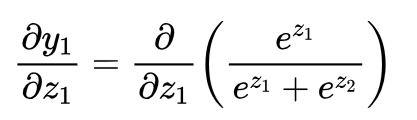
   通过链式法则和商的求导法则，可以得到：
   \[
   \frac{\partial y_1}{\partial z_1} = y_1 (1 - y_1)
   \]
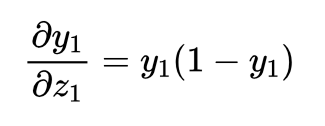
6. **损失函数对线性组合的偏导数**:
   \[
   \frac{\partial L}{\partial z_1} = \frac{\partial L}{\partial y_1} \cdot \frac{\partial y_1}{\partial z_1} = -\tilde{y}_1 (1 - y_1)
   \]
   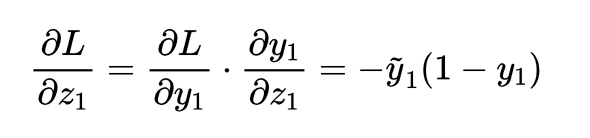
   如果真实标签 \(\tilde{y}_1 = 1\)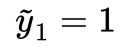，则：
   \[
   \frac{\partial L}{\partial z_1} = y_1 - 1 = \delta_3
   \]
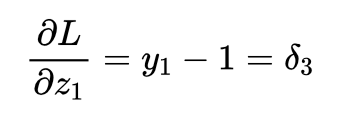
7. **隐藏层的误差项 \(\delta_2\)**:
   \[
   \delta_2 = (1 - \tanh^2(z_1)) \odot \delta_3 W_2^T
   \]
   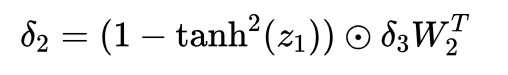
   这是通过链式法则计算的隐藏层的误差项。

8. **权重和偏置的梯度**:
   \[
   \frac{\partial L}{\partial W_2} = a_1^T \delta_3
   \]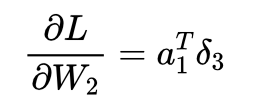
   \[
   \frac{\partial L}{\partial b_2} = \delta_3
   \]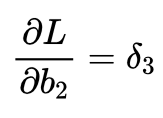
   \[
   \frac{\partial L}{\partial W_1} = x^T \delta_2
   \]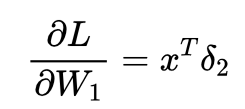
   \[
   \frac{\partial L}{\partial b_1} = \delta_2
   \]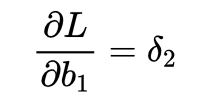

这些公式展示了如何通过反向传播算法计算神经网络中每个参数的梯度，从而更新参数以最小化损失函数。

交叉熵损失函数（Cross-Entropy Loss），通常用于分类问题中的损失计算。让我们逐步解析这个公式：
[ L = -\sum_i \tilde{y}_i \log(y_i) ]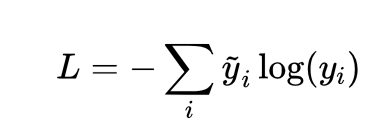
1. ( L ): 这是损失值（Loss），我们希望通过训练模型来最小化这个值。
2. (\sum_i): 这是对所有样本 (i) 进行求和。
3. (\tilde{y}_i): 这是样本 (i) 的真实标签（通常是one-hot编码的向量）。
4. (y_i): 这是模型对样本 (i) 的预测概率（通常是通过softmax函数得到的概率分布）。

具体来说，交叉熵损失函数衡量的是真实标签分布 (\tilde{y}_i) 和预测概率分布 (y_i) 之间的差异。公式中的对数函数 (\log(y_i)) 用于计算预测概率的对数值，然后乘以真实标签 (\tilde{y}_i)，最后对所有样本求和并取负值。

在分类问题中，交叉熵损失函数的作用是当预测概率 (y_i) 越接近真实标签 (\tilde{y}_i) 时，损失值 (L) 越小，从而指导模型参数的更新，使得模型的预测结果越来越准确。

举个例子，假设我们有一个二分类问题，真实标签 (\tilde{y}) 是 [1, 0]（表示第一个类别），模型预测的概率 (y) 是 [0.8, 0.2]，那么交叉熵损失计算如下：

[ L = - (1 \cdot \log(0.8) + 0 \cdot \log(0.2)) = - \log(0.8) ]

通过最小化这个损失值，模型会调整参数，使得预测概率 (y) 更加接近真实标签 (\tilde{y})。

In [ ]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)    # a1: (200,3), probs: (200,2)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1      # (200,2)
        dW2 = (a1.T).dot(delta3)               # (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True)        # (1,2)
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)
        dW1 += lambda_reg * np.sum(W1)
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, y, model_dict)))

    return model_dict

In [ ]:
# Define Initial Weights
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    # Xavier Initialization
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2
    return model

In [ ]:
def plot_decision_boundary(pred_func):
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary for hidden layer size 3")

In [ ]:
# Now Let's start the action
model_dict = init_network(input_dim = input_neurons , hidden_dim = 3, output_dim = output_neurons)
model = backpropagation(X, y, model_dict, 1000)
plot_decision_boundary(lambda x: predict(model, x))